## Семинар 1 "Полносвязные нейронные сети"

ФИО: Докукин Сергей Александрович

В этом задании вам предстоит реализовать проход "вперед" для полносвязной нейронной сети. В дальнейшем мы реализуем процедуру обучения и научим сеть распознавать рукописные цифры.

На первой лекции мы познакомились с тем, что такое нейронные сети и изучили три слоя — линейный, сигмоида и SoftMax. Из этих слоев можно составлять глубокие архитектуры и обучать их при помощи градиентного спуска. Чтобы конструировать сложные архитектуры, можно реализовать каждый тип слоя как отдельный "кирпичик" и затем собирать полную архитектуру как конструктор. Это мы и попробуем сделать на первом и втором семинарах.

Каждый тип слоя мы будем реализовывать при помощи класса, который будет поддерживать три функции: forward, которая будет применять функцию, реализуемую слоем, к входной матрице и backward, которая будет вычислять градиенты и step, которая будет обновлять веса. Чтобы не применять функцию к каждому объекту в отдельности, мы будем подавать на вход слою матрицу размера (N, d), где N — количество объектов, а d — размерность каждого объекта.

<img src=backprop.pdf width=400>

Функция forward будет вычислять по $x$ значение $y$, backward — по $\frac{\partial L}{\partial y}$ вычислять $\frac{\partial L}{\partial x}$ и обновлять внутри себя $\frac{\partial L}{\partial w}$.

Важным требованием к реализации является векторизация всех слоев: все операции должны быть сведены к матричным, не должно быть циклов. Это значительно уменьшает временные затраты.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Часть 1: Линейный слой


Приведем пример вычисления градиентов для линейного слоя: $y = xW^T$, $x \in \mathbb{R}^{K \times n}$, $y \in \mathbb{R}^{K \times n}$, $W \in \mathbb{R}^{m \times n}$, где $K$ — число объектов.

Рассмотрим $L$ как функцию от выходов нейронной сети: $L = L(y_{11}, y_{12}, \dots)$

$$y_i = (Wx)_i = \sum_j W_{i, j}x_j$$

$$\frac{\partial L}{\partial x_{ij}} = \sum_{kt} \frac{\partial L}{\partial y_{kt}}\frac{\partial y_{kt}}{\partial x_{ij}} = \sum_{kt} \frac{\partial L}{\partial y_{kt}}\frac{\partial \sum_z x_{kz}w_{zt}}{\partial x_{ij}}= \sum_{t} \frac{\partial L}{\partial y_{it}}\frac{\partial w_{jt}}{\partial x_{ij}}$$

$$\frac{\partial{L}}{\partial x} = \frac{\partial{L}}{\partial y}W$$

In [2]:
class Linear:
    def __init__(self, input_size, output_size):
        '''
        Creates weights and biases for linear layer.
        Dimention of inputs is *input_size*, of output: *output_size*.
        '''
        #### YOUR CODE HERE
        #### Create weights, initialize them with samples from N(0, 0.1).
        
        self.W = np.random.randn(input_size, output_size) * 0.1
        self.b = np.zeros(output_size)
        
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, input_size).
        Returns output of size (N, output_size).
        Hint: You may need to store X for backward pass
        '''
        #### YOUR CODE HERE
        #### Apply layer to input
        
        self.X = X
        self.Y = X @ self.W + self.b
        
        return self.Y
    
    def backward(self, dLdy):
        '''
        1. Compute dLdw and dLdx.
        2. Store dLdw for step() call
        3. Return dLdx
        '''
        #### YOUR CODE HERE
        
        self.dLdW = self.X.T @ dLdy
        self.dLdb = dLdy.sum(0)
        self.dLdx = dLdy @ self.W.T
        return self.dLdx
    
    def step(self, learning_rate):
        '''
        1. Apply gradient dLdw to network:
        w <- w - l * dLdw
        '''
        #### YOUR CODE HERE
        self.W = self.W - learning_rate * self.dLdW
        self.b = self.b - learning_rate * self.dLdb

In [3]:
lin = Linear(10, 2)
X = np.ones((5, 10))
y = lin.forward(X)
dLdy = np.ones((5, 2))
lin.backward(dLdy).shape, lin.dLdW.shape, lin.dLdb.shape

((5, 10), (10, 2), (2,))

### Часть 2: Численный градиент

Реализуйте функцию проверки численного градиента. Для этого для каждой переменной, по которой считается градиент, надо вычислить численный градиент: $f'(x) \approx \frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$. Функция должна возвращать максимальное абсолютное отклонение аналитического градиента от численного. В качестве $\epsilon$ рекомендуется взять $10^{-6}$. При правильной реализации максимальное отличие будет иметь порядок $10^{-8}-10^{-6}$.

In [4]:
def check_gradient(func, X, gradient):
    '''
    Computes numerical gradient and compares it with analytcal.
    func: callable, function of which gradient we are interested. Example call: func(X)
    X: np.array of size (n x m)
    gradient: np.array of size (n x m)
    Returns: maximum absolute deviation between numerical gradient and analytical.
    '''
    #### YOUR CODE HERE
    numerical_gradient = np.zeros(X.shape)
    eps = 1e-6
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X[i, j] += eps
            y1 = func(X)
            X[i, j] -= 2 * eps
            y2 = func(X)
            X[i, j] += eps
            numerical_gradient[i, j] = (y1 - y2) / 2 / eps
    
    print (np.abs(numerical_gradient - gradient).max())

Протестируйте линейный слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$ и $\frac{\partial L}{\partial w}$.

In [5]:
#### YOUR CODE HERE
func = lambda x: (x ** 2).sum()

In [6]:
np.random.seed(777)
x = np.random.rand(10, 20)
gradient = 2 * x
check_gradient(func, x, gradient)

4.2367764852002665e-09


In [7]:
lin = Linear(10, 2)
X = np.ones((5, 10))
y = lin.forward(X)
func = lambda x: lin.forward(x).sum()
dLdy = np.ones((5, 2))
gradient = lin.backward(dLdy)
check_gradient(func, X, gradient)

5.950617776306899e-11


In [8]:
lin = Linear(10, 2)
X = np.ones((5, 10))
y = lin.forward(X)
def func(W):
    W_old = lin.W
    lin.W = W
    y = lin.forward(X).sum()
    lin.W = W_old
    return y

dLdy = np.ones((5, 2))
W = lin.W
lin.backward(dLdy)
gradient = lin.dLdW
check_gradient(func, W, gradient)

1.4377832258105627e-10


### Часть 3: Сигмоида

In [9]:
class Sigmoid:
    def __init__(self):
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        #### YOUR CODE HERE
        #### Apply layer to input
        self.s = 1. / (1 + np.exp(-X))
        return self.s
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx = dLdy * dydx.
        2. Return dLdx
        '''
        #### YOUR CODE HERE
        return self.s * (1 - self.s) * dLdy
    
    def step(self, learning_rate):
        pass

Протестируйте слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$.

In [10]:
#### YOUR CODE HERE
X = np.ones((5, 10))
s = Sigmoid()
def func(X):
    return s.forward(X).sum()

dLdy = np.ones((5, 10))
s.forward(X)
gradient = s.backward(dLdy)
check_gradient(func, X, gradient)

1.1730462157188981e-09


### Часть 4: Функция потерь

Как мы увидели на семинаре, вычисление производной для связки SoftMax + Negative log-likelihood проще чем для этих двух слоев по отдельности. Поэтому мы реализуем их как один класс. Важное замечание: на проходе "вперед" важно воспользоваться трюком <a href="https://hips.seas.harvard.edu/blog/2013/01/09/computing-log-sum-exp/">log-sum-exp</a>, чтобы не столкнуться с численными неустойчивостями.

In [11]:
np.random.seed(777)
a = np.random.rand(10, 4)
b = np.random.randint(0, 4, 10)

In [12]:
class NLLLoss:
    def __init__(self):
        '''
        Applies Softmax operation to inputs and computes NLL loss
        '''
        pass
    
    def forward(self, X, y):
        '''
        Passes objects through this layer.
        X is np.array of size (N, C), where C is the number of classes
        y is np.array of size (N), contains correct labels
        '''
        self.p = np.exp(X)
        self.p /= self.p.sum(1, keepdims=True)
        self.y = np.zeros((X.shape[0], X.shape[1]))
        self.y[np.arange(X.shape[0]), y] = 1
        return - (np.log(self.p) * self.y).sum(1).mean(0)
    
    def backward(self):
        '''
        Note that here dLdy = 1 since L = y
        1. Compute dLdx
        2. Return dLdx
        '''
        return (self.p - self.y) / self.y.shape[0]

Протестируйте слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$.

In [13]:
#### YOUR CODE HERE
np.random.seed(777)
X = np.random.rand(15, 4)
y = np.random.randint(0, 4, 15)

In [14]:
loss = NLLLoss()
loss.forward(X, y)
func = lambda x: loss.forward(x, y)
check_gradient(func, X, loss.backward())

1.8305948423780194e-10


### Часть 5, нейронная сеть

Теперь, когда у нас есть "кирпичики", мы можем написать класс, который будет собирать всю сеть вместе 

In [15]:
class NeuralNetwork:
    def __init__(self, modules):
        '''
        Constructs network with *modules* as its layers
        '''
        self.modules = modules
    
    def forward(self, X):
        y = X
        for i in range(len(self.modules)):
            y = self.modules[i].forward(y)
        return y
    
    def backward(self, dLdy):
        '''
        dLdy here is a gradient from loss function
        '''
        for i in range(len(self.modules))[::-1]:
            dLdy = self.modules[i].backward(dLdy)
    
    def step(self, learning_rate):
        for i in range(len(self.modules)):
            self.modules[i].step(learning_rate)

### Часть 6, обучение на простых данных

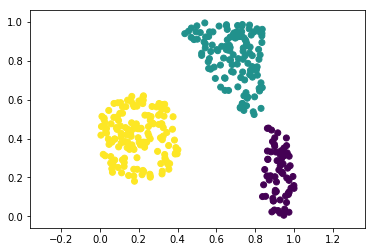

In [16]:
data = np.load('data.npz')
X, y = data['arr_0'], data['arr_1']
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

Обучите архитектуру вида 2 -> 10 -> 10 -> 3:
* Linear(2, 10)
* Sigmoid()
* Linear(10, 10)
* Sigmoid()
* Linear(10, 3)

В качестве функции потерь используйте NLLLoss.
1. Создайте сеть, в цикле запускайте forward, backward, step (используйте learning rate 0.005). 
2. Нарисуйте график сходимости (величина NLL после каждого обновления).
3. Нарисуйте разделяющую поверхность
4. Попробуйте подобрать темп обучения. Как меняется сходимость?

In [17]:
arc = [Linear(2, 3), Sigmoid(), Linear(3, 3)]
network = NeuralNetwork(arc)
loss_func = NLLLoss()

In [18]:
losses = []
for i in range(16000):
    prediction = network.forward(X)
    loss = loss_func.forward(prediction, y)
    losses.append(loss)
    dLdy = loss_func.backward()
    network.backward(dLdy)
    network.step(0.1)

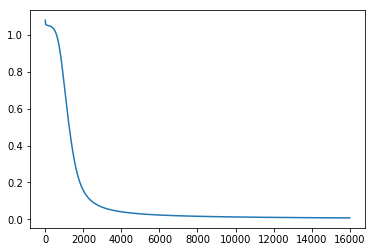

In [19]:
plt.plot(losses)

In [20]:
N = 50
x_grid = np.linspace(-0.2, 1.2, N)
y_grid = np.linspace(0, 1, N)

In [21]:
X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)

In [22]:
mesh = np.dstack((X_mesh, Y_mesh)).reshape(N * N, 2)
predictions = np.argmax(network.forward(mesh), 1)

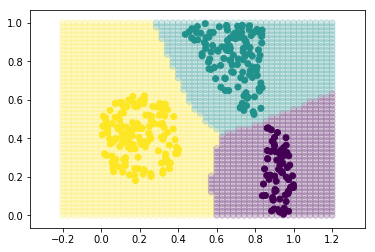

In [23]:
plt.scatter(mesh[:, 0], mesh[:, 1], c=predictions, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

Отличная визуализация: http://playground.tensorflow.org/

## Домашнее задание:

* Подберите темп обучения. Как меняется сходимость? Нарисуйте график оптимального значения функции потерь для различных значений learning_rate
* Решите поставленную выше задачу как задачу регрессии с MSE. Изменилась ли разделяющая поверхность?

In [24]:
### YOUR CODE HERE:
import copy

def train_network(arc, loss_func, learning_rate, nsteps):
    netarc = copy.deepcopy(arc)
    network = NeuralNetwork(netarc)
    
    losses = []
    for i in range(nsteps):
        prediction = network.forward(X)
        loss = loss_func.forward(prediction, y)
        losses.append(loss)
        dLdy = loss_func.backward()
        network.backward(dLdy)
        network.step(learning_rate)

    return network, losses   

In [25]:
arc = [Linear(2, 3), Sigmoid(), Linear(3, 3)]
loss_func = NLLLoss()

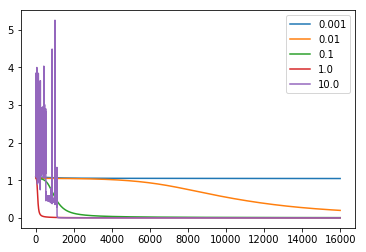

In [26]:
learning_rates = np.logspace(-3, 1, num=5)
n_steps = 16000

for learning_rate in learning_rates:
    _, losses = train_network(arc, loss_func, learning_rate, n_steps)
    plt.plot(losses, label=str(learning_rate))
plt.legend() 

Видно, что при learning_rate = 1 обучается быстрее и стабильнее всего (при learning_rate = 10 обучается достаточно быстро, но очень нестабильно)

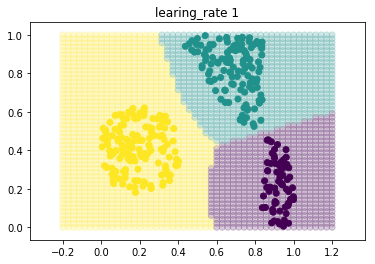

In [27]:
learning_rate = 1
n_steps = 5000

network, _ = train_network(arc, loss_func, learning_rate, n_steps)        
predictions = np.argmax(network.forward(mesh), 1)

plt.scatter(mesh[:, 0], mesh[:, 1], c=predictions, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.title('learing_rate {}'.format(learning_rate))
plt.show()

In [28]:
class MSELoss:
    def __init__(self):
        pass
    
    def forward(self, X, y):
        self.shapeX = X.shape
        self.X = X.reshape(-1)
        self.y = y
        return ((self.X - self.y) ** 2).sum() * 0.5
    
    def backward(self):
        return (self.X - self.y).reshape(self.shapeX)

In [29]:
arc = [Linear(2, 3), Sigmoid(), Linear(3, 1)]
loss_func = MSELoss()

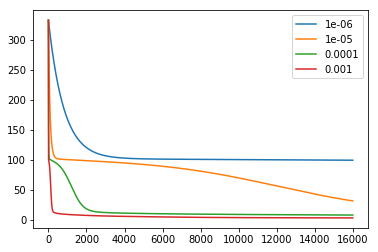

In [30]:
learning_rates = np.logspace(-6, -3, num=4)
n_steps = 16000

for learning_rate in learning_rates:
    _, losses = train_network(arc, loss_func, learning_rate, n_steps)
    plt.plot(losses, label=str(learning_rate))
plt.legend() 

learning_rate взял меньше, так как при более высоких почему-то расходится. Наилучший learning_rate для данного случая получился 0.001, хотя при 0.0001 тоже нормально.

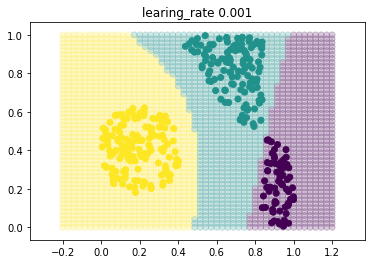

In [31]:
learning_rate = 0.001
n_steps = 5000

network, _ = train_network(arc, loss_func, learning_rate, n_steps)        
predictions = np.round(network.forward(mesh).reshape(-1), 0)
predictions[predictions > 2] = 2
predictions[predictions < 0] = 0

plt.scatter(mesh[:, 0], mesh[:, 1], c=predictions, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.title('learing_rate {}'.format(learning_rate))
plt.show()

Разделяющая поверхность меняется. В прошлом случае она была полностью симметричной, а теперь она, в каком-то смысле, начала напоминать форму кластеров. Хотя, в связи с рандомностью затравок в линейных слоях, разделяющая поверхность бывает разной и при использовании одного и того же метода. 